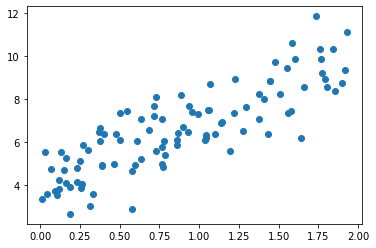

In [2]:
import numpy as np
x = 2 *np.random.rand(100,1)
y = 4 + 3 *x + np.random.randn(100,1)
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [18]:
def NormalEq(x,y):
    x_b = np.c_[np.ones((100,1)),x] #Translates slice objects to concatenation along the second axis
    theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
    y_hat = x*theta_best[1]+theta_best[0]
    return theta_best, y_hat

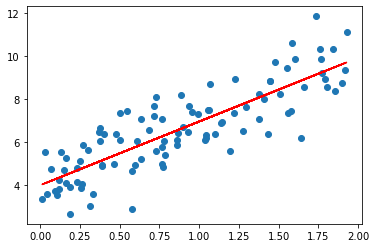

In [19]:
theta_best,y_hat = NormalEq(x,y)
plt.scatter(x,y)
plt.plot(x,y_hat,"r-")
plt.show()

In [ ]:
x_b = np.c_[np.ones((100,1)),x]
print(x_b)
print(x)

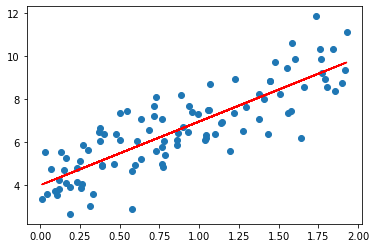

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
a,b = lin_reg.intercept_, lin_reg.coef_
something = lin_reg.predict(x)
plt.scatter(x,y)
plt.plot(x,something,"r-")
plt.show()

In [30]:
def BGD(iters,lr,m,x,y):
    x_b = np.c_[np.ones((100,1)),x]
    theta = np.random.randn(2,1)
    for iter in range(iters):
        gradient_theta = 2/m * x_b.T.dot(x_b.dot(theta)-y)
        theta = theta - lr*gradient_theta
    return theta; 

In [31]:
print(BGD(1000,0.1,100,x,y))

[[4.00964721]
 [2.96101673]]


In [34]:
def SGD(iters,m,x,y):
    x_b = np.c_[np.ones((100,1)),x]
    theta  = np.random.randn(2,1)
    for iter in range(iters):
        for i in range(m):
            index = np.random.randint(m)
            xi = x_b[index:index+1]
            yi = y[index:index+1]
            gradient_theta = 2/m * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_schedule(iter * m + i,5,50)
            theta = theta - eta*gradient_theta
    return theta

def learning_schedule(t,t0,t1):
 return t0 / (t + t1)


In [51]:
print(SGD(50,100,x,y))

[[2.51210765]
 [0.82138671]]


In [47]:
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)#runs until 1000 epochs or until loss drops till 0.001. starts with lr = 0.1 using default lr schedule. no regularization
sgdreg.fit(x,y.ravel())
sgdreg.intercept_, sgdreg.coef_

(array([4.02678976]), array([3.00226684]))

In [48]:

def MBGD(iters,m,x,y,minibatch):
    x_b = np.c_[np.ones((100,1)),x]
    theta  = np.random.randn(2,1)
    t = 0
    for iter in range(iters):
        index = np.random.permutation(m)
        x_shuffled = x_b[index] #shuffled, jus shuffled for better chance
        y_shuffled = y[index] #shuffled, jus shuffled for better chance
        for i in range(0,m,minibatch):
            t += 1
            xi = x_shuffled[i:i+minibatch]
            yi = y_shuffled[i:i+minibatch]
            gradient_theta = 2/minibatch * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_schedule(t,5,50)
            theta = theta - eta*gradient_theta
    return theta

In [50]:
print(MBGD(50,100,x,y,20))

[[4.0010362 ]
 [2.97010054]]


In [58]:
##polynomial regression, y = ax**2 + bx + c, number of parameters - 3 + 1
#lets decide the parameters
np.random.seed(69)
parameters = np.random.randint(1,10,4)
print(parameters)


[7 8 5 2]


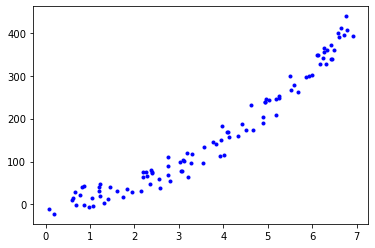

In [62]:
m = 100
x = np.random.rand(m,1)*7
y = 8*x**2 + 5*x + 2 + np.random.randn(m,1)*20
plt.plot(x,y,"b.")

[[-72.56152219]
 [ 63.39240092]]


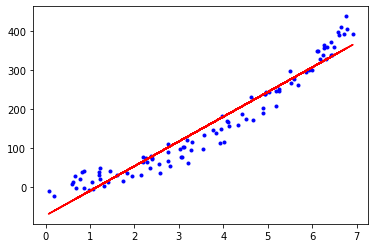

In [63]:
theta_best,y_hat = NormalEq(x,y)
print(theta_best)
plt.plot(x,y,"b.")
plt.plot(x,y_hat,"r-")

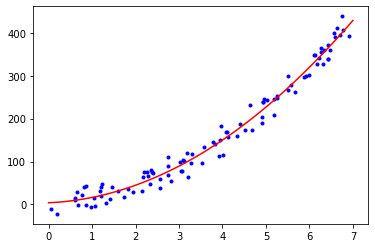

In [76]:
#dosent work right
from sklearn.preprocessing import PolynomialFeatures
Poly_features = PolynomialFeatures(degree=2)
x_poly = Poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
X_new=np.linspace(0, 7, 100).reshape(100, 1)
X_new_poly = Poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(x,y,"b.")
plt.plot(X_new,y_new,"r-")
#PolynomialFeatures(degree=d) transforms an array containing n
# features into an array containing (n + d)! / d!n! features, higher degree mdel can severly overfit, can use cross-validation to check
